In [78]:
import numpy as np

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 2.1

In [80]:
import random
random.seed(1)

max_num_tasks = 2000
num_arms = 10 #n
num_plays = 1000

In [81]:
Q_star = np.random.normal(0, 1, (max_num_tasks, num_arms))

In [82]:
# Exercise 2.1

epsilon = [0, 0.1, 0.01]
all_rewards = np.zeros((len(epsilon), num_plays, max_num_tasks))
is_best_arm = np.zeros((len(epsilon), num_plays, max_num_tasks))

qT = np.zeros((len(epsilon), max_num_tasks, num_arms))
qN = np.zeros((len(epsilon), max_num_tasks, num_arms))
qS = np.zeros((len(epsilon), max_num_tasks, num_arms))

for idx_e in range(len(epsilon)):
    e = epsilon[idx_e]
    print(e)
    for idx_play in range(num_plays):
        for idx_task in range(max_num_tasks):
            best_arm = np.argmax(Q_star[idx_task, :])
            if (np.random.uniform(0, 1) < e):
                arm = np.random.randint(low=0, high=num_arms, size=1)
            else:
                arm = np.argmax(qT[idx_e, idx_task, :], axis=0)
                
            if arm == best_arm:
                is_best_arm[idx_e, idx_play, idx_task] = 1
            
            current_reward = np.random.normal(Q_star[idx_task, arm], 1)
            all_rewards[idx_e, idx_play, idx_task] = current_reward
            qS[idx_e, idx_task, arm] = qS[idx_e, idx_task, arm] + current_reward
            qN[idx_e, idx_task, arm] = qN[idx_e, idx_task, arm] + 1
            qT[idx_e, idx_task, arm] = qS[idx_e, idx_task, arm] / qN[idx_e, idx_task, arm]


0
0.1
0.01


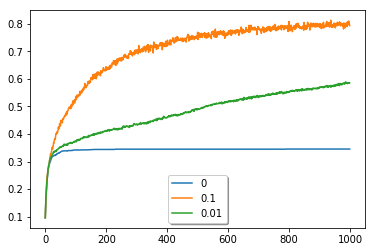

In [83]:
fig, ax = plt.subplots()

for idx_e, e in enumerate(epsilon): 
    ax.plot(np.mean(is_best_arm[idx_e, :, :], axis=1), label=e)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

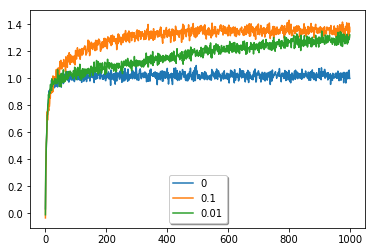

In [84]:
fig, ax = plt.subplots()

for idx_e, e in enumerate(epsilon): 
    ax.plot(range(num_plays), np.mean(all_rewards[idx_e, :, :], axis=1), label=e)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

It looks like when epsilon=0.1 performs best in the long run in terms of the cumulative reward and cumulative probability of selecting the best action. 

## Exercise 2.2

In [75]:
tau = [0.05, 0.1, 0.15]
all_rewards = np.zeros((len(tau), num_plays, max_num_tasks))
is_best_arm = np.zeros((len(tau), num_plays, max_num_tasks))

qT = np.zeros((len(tau), max_num_tasks, num_arms))
qN = np.zeros((len(tau), max_num_tasks, num_arms))
qS = np.zeros((len(tau), max_num_tasks, num_arms))

def softmax_explore(qT, tau):
    exp_qt = np.exp(qT/tau)
    return exp_qt / exp_qt.sum()

for idx_t, t in enumerate(tau):
    print(t)
    for idx_play in range(num_plays):
        for idx_task in range(max_num_tasks):
            best_arm = np.argmax(Q_star[idx_task, :])

            softmax_prob = softmax_explore(qT[idx_t, idx_task, :], t)
            arm = np.random.choice(np.arange(0, num_arms), p=softmax_prob)
                
            if arm == best_arm:
                is_best_arm[idx_t, idx_play, idx_task] = 1
            
            current_reward = np.random.normal(Q_star[idx_task, arm], 1)
            all_rewards[idx_t, idx_play, idx_task] = current_reward
            qS[idx_t, idx_task, arm] = qS[idx_t, idx_task, arm] + current_reward
            qN[idx_t, idx_task, arm] = qN[idx_t, idx_task, arm] + 1
            qT[idx_t, idx_task, arm] = qS[idx_t, idx_task, arm] / qN[idx_t, idx_task, arm]


0.05
0.1
0.15


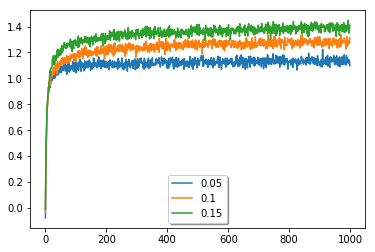

In [76]:
fig, ax = plt.subplots()

for idx_t, t in enumerate(tau): 
    ax.plot(range(num_plays), np.mean(all_rewards[idx_t, :, :], axis=1), label=t)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

(1000,)


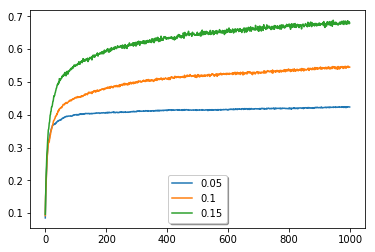

In [77]:
# Percent picked the correct action

fig, ax = plt.subplots()
print(np.mean(is_best_arm[0, :, :], axis=1).shape)
for idx_t, t in enumerate(tau):
    ax.plot(range(num_plays), np.mean(is_best_arm[idx_t, :, :], axis=1), label=t)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

In [56]:
# If tau is too small, we have underflow error...
tau = [.05, .1, .15]

all_rewards = np.zeros((len(tau), max_num_tasks, num_plays))
picked_max_action = np.zeros((len(tau), max_num_tasks, num_plays))

for tau_idx, t in enumerate(tau):
    qT = np.zeros(Q_star.shape)
    qN = np.zeros( (max_num_tasks, num_arms) )
    qS = qT.copy()
    for b in range(max_num_tasks):
        best_arm = np.argmax(Q_star[b, :])
        
        for p in range(num_plays):
            softmax = np.exp(qT[b, :] / t) / np.sum(np.exp(qT[b, :] / t))
            # choose arm with probabilitiy in softmax
            cum = np.cumsum(softmax)
            selection = np.random.uniform(0, 1)
            arm = np.sum(selection > cum)

            # determine if arm selected is the best possible
            if arm == best_arm:
                picked_max_action[tau_idx, b, p] = 1
                
            # Insert some noise in the reward
            reward = Q_star[b, arm] + np.random.normal(0, 1)
            all_rewards[tau_idx, b, p] = reward
            qN[b, arm] = qN[b, arm] + 1
            qS[b, arm] = qS[b, arm] + reward
            qT[b, arm] = qS[b, arm] / qN[b, arm]

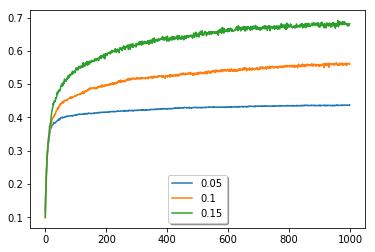

In [57]:
fig, ax = plt.subplots()
for eps_idx, eps in enumerate(tau):
    ax.plot(np.mean(picked_max_action[eps_idx, :, :], axis=0), label=eps)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()